## (a) Adiabatic PFR

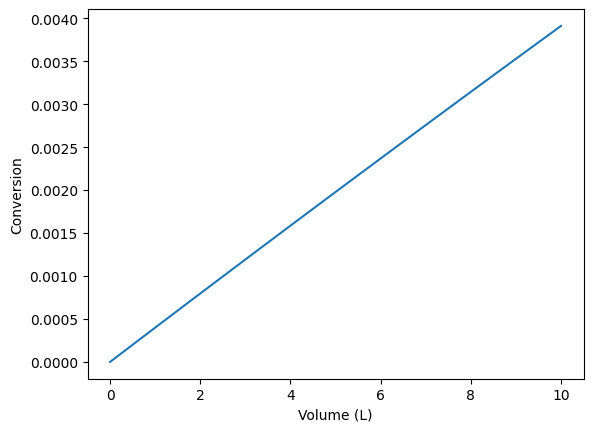

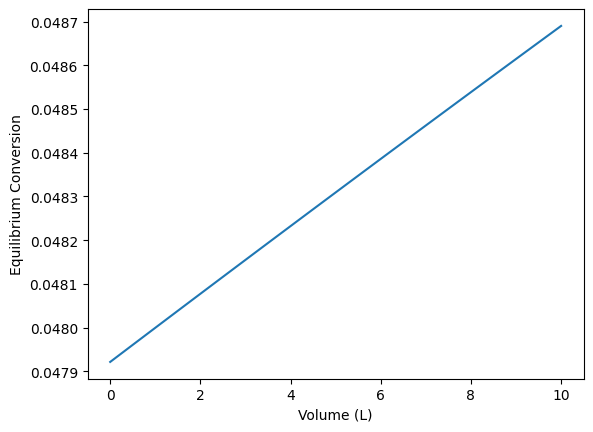

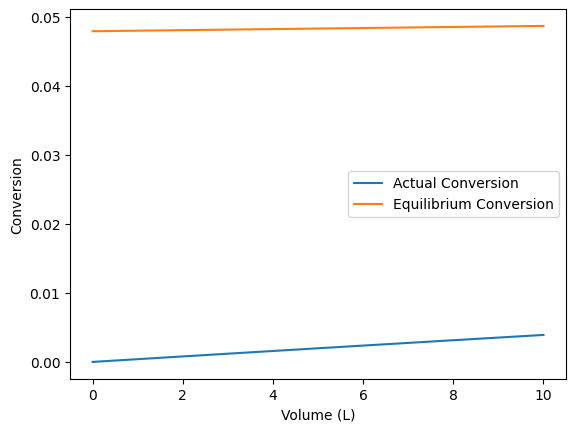

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

#rate constant at 300 K Lmol-1s-1
k0 = 0.01
#Equilibrium constant at 450 K Lmol-1
K0 = 10
#Heat of Reaction kJ/mol
Hrx = -190+72+96
#initial condition
X0 = 0
V = np.linspace(0,10,100)

def Model1(x,V):
    #Energy Balance
    T = 300 - Hrx*1e3*x/(72+72)
    #Arrhenius Equation
    k = k0*np.exp(48000/8.3145*(1/300-1/T))
    #Van't Hoff Equation
    K = K0*np.exp(Hrx*1e3/8.3145*(1/T-1/450))
    #Design Equation
    dX = k*(0.1*0.1*(1-x)**2-.1*x/K)/.25

    return dX

X = odeint(Model1,X0,V)
LT = 300 - Hrx*1e3*X/(72+72)
LK = K0*np.exp(Hrx*1e3/8.3145*(1/LT-1/450))
Xe = 1+.5/.1/LK-np.sqrt(4*LK*.1+1)*.5/.1/LK

plt.plot(V,X)
plt.xlabel("Volume (L)")
plt.ylabel("Conversion")
plt.show()

plt.plot(V,Xe)
plt.xlabel("Volume (L)")
plt.ylabel("Equilibrium Conversion")
plt.show()

#For comparison
plt.plot(V,X,label = "Actual Conversion")
plt.plot(V,Xe,label = "Equilibrium Conversion")
plt.xlabel("Volume (L)")
plt.ylabel("Conversion")
plt.legend()
plt.show()

## (b) PFR with Constant T Coolant

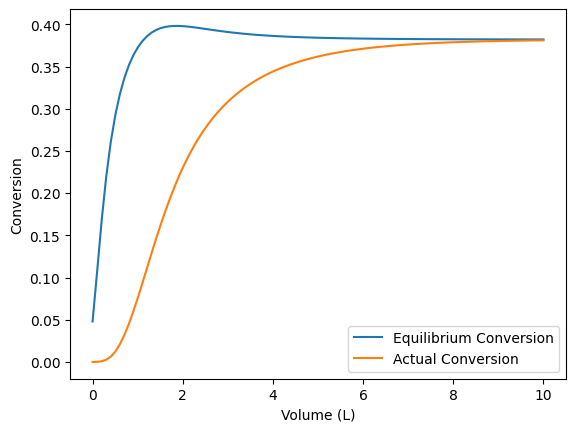

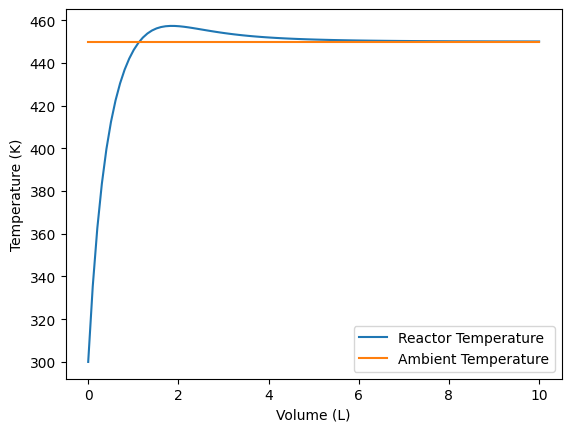

In [2]:
#Heat transfer coefficient J/m^3sK
Ua = 96
#initial condition
L0 = (0,300)
V = np.linspace(0,10,100)

def Model2(L,V):
    #x and T is elements of list L
    x,T = L
    #Arrhenius Equation
    k = k0*np.exp(48000/8.3145*(1/300-1/T))
    #Van't Hoff Equation
    K = K0*np.exp(Hrx*1e3/8.3145*(1/T-1/450))
    #rate law
    minusrA = k*(0.1*0.1*(1-x)**2-.1*x/K)
    #Energy Balance
    dT = (Ua*(450-T)-minusrA*Hrx*1e3)/.25/(72+72)
    #Design Equation
    dX = minusrA/.25

    return [dX,dT]

L = odeint(Model2,L0,V)
LK = K0*np.exp(Hrx*1e3/8.3145*(1/L[:,1]-1/450))
Xe = 1+.5/.1/LK-np.sqrt(4*LK*.1+1)*.5/.1/LK

plt.plot(V,Xe,label = "Equilibrium Conversion")
plt.plot(V,L[:,0],label = "Actual Conversion")
plt.xlabel("Volume (L)")
plt.ylabel("Conversion")
plt.legend()
plt.show()

plt.plot(V,L[:,1], label = "Reactor Temperature")
plt.plot([0,10],[450,450], label = "Ambient Temperature")
plt.xlabel("Volume (L)")
plt.ylabel("Temperature (K)")
plt.legend()
plt.show()

## (c) PFR with co-current heat exchanger
### At $\dot{m} = 50 g/s$, Volume 0-10 L

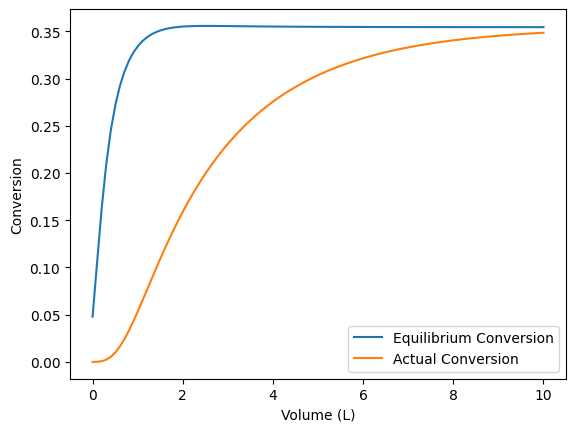

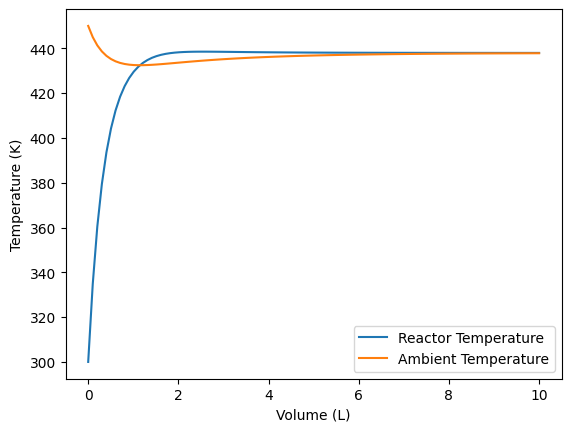

In [3]:
#initial condition
L0 = (0,300,450)
V = np.linspace(0,10,100)

def Model3(L,V):
    #x and T is elements of list L
    x,T,Ta = L
    #Arrhenius Equation
    k = k0*np.exp(48000/8.3145*(1/300-1/T))
    #Van't Hoff Equation
    K = K0*np.exp(Hrx*1e3/8.3145*(1/T-1/450))
    #rate law
    minusrA = k*(0.1*0.1*(1-x)**2-.1*x/K)
    #Energy Balance
    dT = (Ua*(Ta-T)-minusrA*Hrx*1e3)/.25/(72+72)
    dTa = Ua*(T-Ta)/5/50
    #Design Equation
    dX = minusrA/.25

    return [dX,dT,dTa]

L = odeint(Model3,L0,V)

#This final temperature will be initial guess of coolant temperature of counter current heat exchanger.
Ta0g = L[-1,-1]

LK = K0*np.exp(Hrx*1e3/8.3145*(1/L[:,1]-1/450))
Xe = 1+.5/.1/LK-np.sqrt(4*LK*.1+1)*.5/.1/LK

plt.plot(V,Xe,label = "Equilibrium Conversion")
plt.plot(V,L[:,0],label = "Actual Conversion")
plt.xlabel("Volume (L)")
plt.ylabel("Conversion")
plt.legend()
plt.show()

plt.plot(V,L[:,1],label = "Reactor Temperature")
plt.plot(V,L[:,-1], label = "Ambient Temperature")
plt.xlabel("Volume (L)")
plt.ylabel("Temperature (K)")
plt.legend()
plt.show()

# For comparing with countercurrent heat exchanger
Xcoc = L[:,0]

### At volume 10 L, $\dot{m}$ 10-1000 g/s

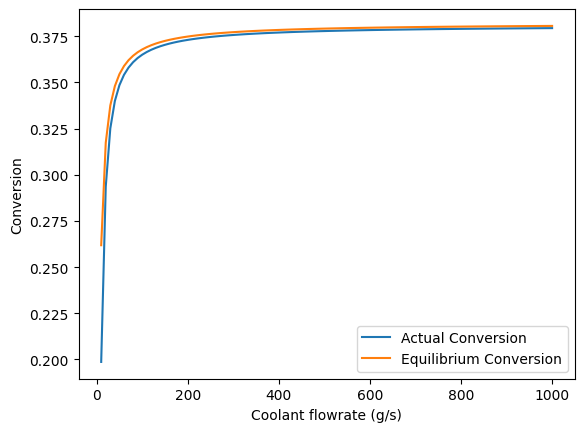

In [4]:
#initial condition
L0 = (0,300,450)

V = np.linspace(0,10,2)
M = np.linspace(10,1000,100)
S = []
m = 10
#This list is to store initial guess to next session.
Ta0 = []

def Model3(L,V):
    #x and T is elements of list L
    x,T,Ta = L
    #Arrhenius Equation
    k = k0*np.exp(48000/8.3145*(1/300-1/T))
    #Van't Hoff Equation
    K = K0*np.exp(Hrx*1e3/8.3145*(1/T-1/450))
    #rate law
    minusrA = k*(0.1*0.1*(1-x)**2-.1*x/K)
    #Energy Balance
    dT = (Ua*(Ta-T)-minusrA*Hrx*1e3)/.25/(72+72)
    dTa = Ua*(T-Ta)/5/m
    #Design Equation
    dX = minusrA/.25

    return [dX,dT,dTa]

for i in M:
    m = i
    Si = odeint(Model3,L0,V)
    S.append(Si[-1,0:2])
    Ta0.append(Si[-1,1])
    
S = np.array(S)
T = S[:,-1]
LK = K0*np.exp(Hrx*1e3/8.3145*(1/T-1/450))
Xe = 1+.5/.1/LK-np.sqrt(4*LK*.1+1)*.5/.1/LK

plt.plot(M,S[:,0], label = "Actual Conversion")
plt.plot(M,Xe,label = "Equilibrium Conversion")
plt.xlabel("Coolant flowrate (g/s)")
plt.ylabel("Conversion")
plt.legend()

plt.show()

#For comparison
Xcocm = S[:,0]

## (d) PFR with counter current heat exchanger
### $\dot{m}$ 50 g/s, V = 0-10 L

449.9999999999999


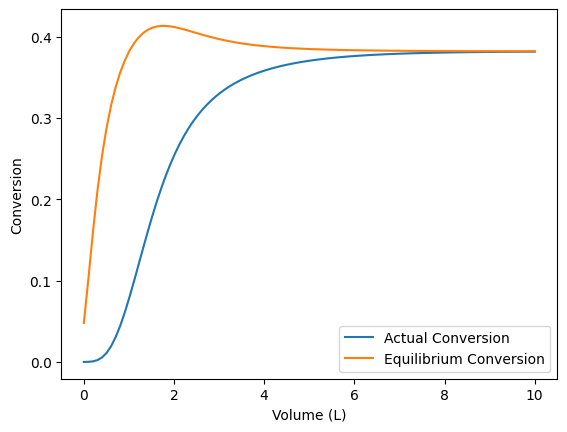

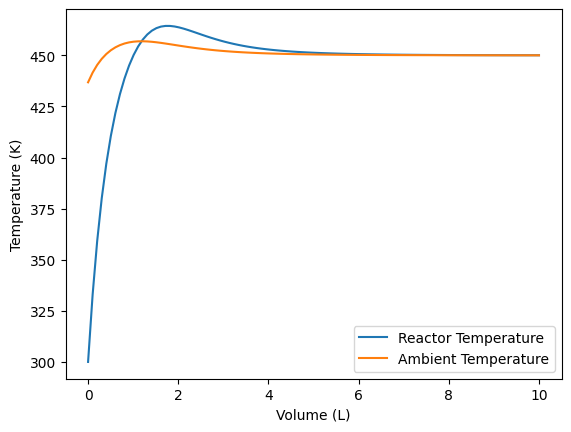

In [5]:
V = np.linspace(0,10,100)

def Model4(L,V):
    #x and T are elements of list L
    x,T,Ta = L
    #Arrhenius Equation
    k = k0*np.exp(48000/8.3145*(1/300-1/T))
    #Van't Hoff Equation
    K = K0*np.exp(Hrx*1e3/8.3145*(1/T-1/450))
    #rate law
    minusrA = k*(0.1*0.1*(1-x)**2-.1*x/K)
    #Energy Balance
    dT = (Ua*(Ta-T)-minusrA*Hrx*1e3)/.25/(72+72)
    dTa = -Ua*(T-Ta)/5/50
    #Design Equation
    dX = minusrA/.25

    return [dX,dT,dTa]

U = Ta0g
L = 350
e = 1
while e > 1e-25:
    Tg = (U+L)/2
    S0 = (0,300,Tg)
    S = odeint(Model4,S0,V)
    Tf = S[-1,-1]
    e = (450-Tf)**2
    if e <= 1e-25:
        break
    elif Tf > 450:
        U = Tg
    else:
        L = Tg
print(Tf)

LK = K0*np.exp(Hrx*1e3/8.3145*(1/S[:,1]-1/450))
Xe = 1+.5/.1/LK-np.sqrt(4*LK*.1+1)*.5/.1/LK

plt.plot(V,S[:,0], label = "Actual Conversion")
plt.plot(V,Xe, label = "Equilibrium Conversion")
plt.xlabel("Volume (L)")
plt.ylabel("Conversion")
plt.legend()

plt.show()

plt.plot(V,S[:,1], label = "Reactor Temperature")
plt.plot(V,S[:,-1], label = "Ambient Temperature")
plt.xlabel("Volume (L)")
plt.ylabel("Temperature (K)")
plt.legend()

plt.show()

# For comparison
Xcou = S[:,0]

### V = 10 L, $\dot{m}$ 10-1000 g/s

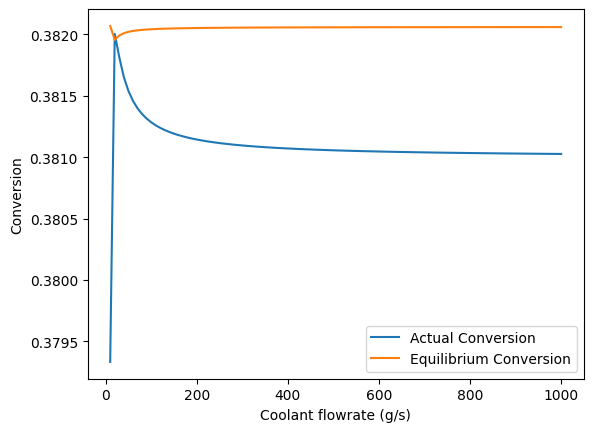

In [6]:
V = np.linspace(0,10,2)
M = np.linspace(10,1000,100)
m = 10
def Model4(L,V):
    #x and T is elements of list L
    x,T,Ta = L
    #Arrhenius Equation
    k = k0*np.exp(48000/8.3145*(1/300-1/T))
    #Van't Hoff Equation
    K = K0*np.exp(Hrx*1e3/8.3145*(1/T-1/450))
    #rate law
    minusrA = k*(0.1*0.1*(1-x)**2-.1*x/K)
    #Energy Balance
    dT = (Ua*(Ta-T)-minusrA*Hrx*1e3)/.25/(72+72)
    dTa = -1*Ua*(T-Ta)/5/m
    #Design Equation
    dX = minusrA/.25

    return [dX,dT,dTa]
S = []
for i in range(len(M)):
    m = M[i]
    U = 2*Ta0[i]-330
    L = 330
    e = 1
    while e > 1e-24:
        Tg = (U+L)/2
        S0 = (0,300,Tg)
        Si = odeint(Model4,S0,V)
        Tf = Si[-1,-1]
        e = (450-Tf)**2
        if e <= 1e-24:
            break
        elif Tf > 450:
            U = Tg
        else:
            L = Tg
    S.append(Si[-1,0:2])

S = np.array(S)
T = S[:,-1]
LK = K0*np.exp(Hrx*1e3/8.3145*(1/T-1/450))
Xe = 1+.5/.1/LK-np.sqrt(4*LK*.1+1)*.5/.1/LK

plt.plot(M,S[:,0], label = "Actual Conversion")
plt.plot(M,Xe,label = "Equilibrium Conversion")
plt.xlabel("Coolant flowrate (g/s)")
plt.ylabel("Conversion")
plt.legend()

plt.show()

#For comparison
Xcoum = S[:,0]

## (Extra) Comparison of co-current and countercurrent heat exchanger at $\dot{m}$ = 50 g/s

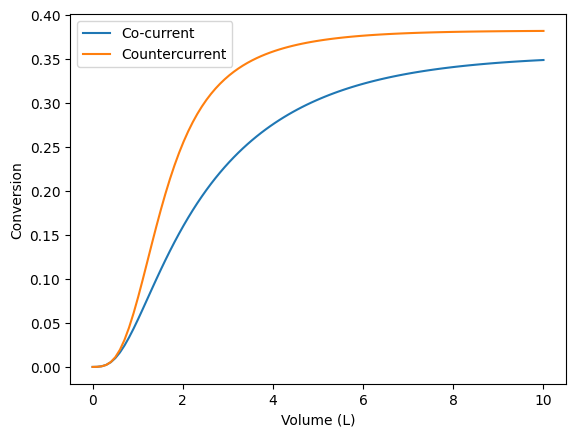

In [7]:
V = np.linspace(0,10,100)
plt.plot(V,Xcoc, label = "Co-current")
plt.plot(V,Xcou, label = "Countercurrent")
plt.ylabel("Conversion")
plt.xlabel("Volume (L)")
plt.legend()
plt.show()

## At V = 10 L

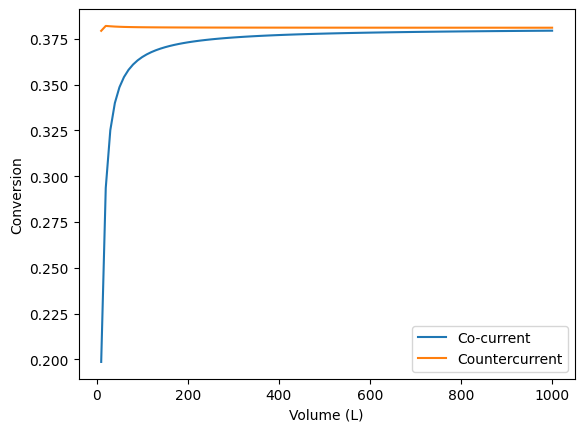

In [8]:
plt.plot(M,Xcocm, label = "Co-current")
plt.plot(M,Xcoum, label = "Countercurrent")
plt.ylabel("Conversion")
plt.xlabel("Coolant flow rate (g/s)")
plt.legend()
plt.show()